In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from scipy import stats

In [3]:
# exp0 = pd.read_csv('results/exp_0.txt')
# exp0.head()

In [102]:
def extract_result_dict(lines2):

    k = 0
    results = {}
    results['index'] = []
    results['aux'] = []
    results['top_index'] = []
    results['score'] = []
    results['ecc'] = []
    for i,line in enumerate(lines2):
        if i==0:
            continue
        else:
            try:
                l = line.split(',')
                results['index'].append(l[0])
                results['aux'].append(parse_aux_dataframe(l[1]))
                if len(l)>=3:
                    results['top_index'].append(l[2])
                    results['score'].append(l[3])
                    results['ecc'].append(l[4])
                else:
                    results['top_index'].append(None)
                    results['score'].append(None)
                    results['ecc'].append(None)
            except:
                print(line)
                continue
    return results

def parse_results(filename, with_header=True):
    with open("results/{}".format(filename), "r") as f:
        lines = f.readlines()
        
    l = np.array([i for i,line in enumerate(lines) if line.startswith('custId')])
    freq = stats.mode(np.diff(l)).mode[0]
        
    lines2 = ['']
    l = ''
    for i,line in enumerate(lines):
        lines2[-1] += line
        if i%freq==0:
            lines2.append('')

    if lines2[-1]=='':
        lines2.pop(-1)
        
    results = extract_result_dict(lines2)
    df = pd.DataFrame(results)
    df = df.astype({'index':np.int32, 'aux':'object', 'top_index':np.int32, 'score':np.float32, 'ecc':np.float32})
    return df

def parse_aux_dataframe(s):
    l2 = s.split('\n')
    col_names = re.sub("\s\s+", " ", l2[0]).strip().split(' ')
    idx_name = l2[1].strip()
    records = [re.sub("\s\s+", " ", line).split(' ') for line in l2[2:]]

    df = pd.DataFrame(records, columns=[idx_name]+col_names).set_index(idx_name)
    return df

In [152]:
import os
filenames = sorted(os.listdir('results'))

experiment_map = {'exp_0.txt':[2,2,3],
                  'exp_1.txt':[3,4,3],
                  'exp_2.txt':[6,8,3],
                  'exp_3.txt':[2,2,14],
                  'exp_4.txt':[3,4,14],
                  'exp_5.txt':[6,8,14]}

experiments = {}

for filename in filenames:
#     df = parse_results(filename, with_header=True)
    try:
        df = parse_results(filename, with_header=True)
        print('nb experiments for {}: {}'.format(filename, len(df)))
        experiments[filename] = df
    except:
        print('parsing failed for {}'.format(filename))
        continue

nb experiments for exp_0.txt: 100
nb experiments for exp_1.txt: 100
nb experiments for exp_3.txt: 80
nb experiments for exp_4.txt: 65
parsing failed for exp_5.txt


In [150]:
statistics = {'nb_movies':[], 'days':[], 'proba':[]}
for filename,df in experiments.items():
    print('experiment {}'.format(experiment_map[filename]))
    print((df['index'] == df['top_index']).sum()/len(df))
    print(((df['index'] == df['top_index'])&(df['ecc']>=1.5)).sum()/len(df))
    l = experiment_map[filename]
    statistics['nb_movies'].append('{}-{}'.format(l[0],l[1]))
    statistics['days'].append(l[2])
    statistics['proba'].append(((df['index'] == df['top_index'])&(df['ecc']>=1.5)).sum()/len(df))

experiment [2, 2, 3]
0.38
0.26
experiment [3, 4, 3]
0.75
0.62
experiment [2, 2, 14]
0.4625
0.35
experiment [3, 4, 14]
0.7538461538461538
0.6615384615384615


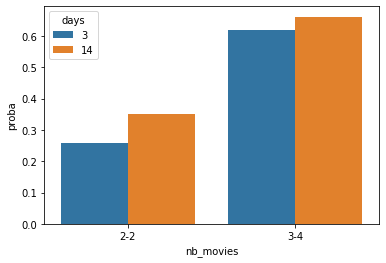

In [151]:
df = pd.DataFrame(statistics)#.set_index(['nb_movies', 'days']).unstack()
sns.barplot(x='nb_movies', y='proba', hue='days', data=df)

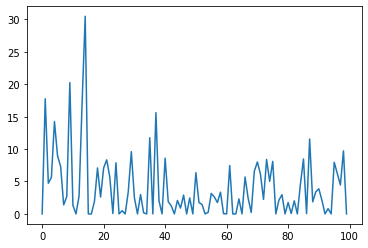

In [105]:
plt.plot(df['ecc'])